In [ ]:
!pip install tensorflow==2.0.0rc0
import tensorflow as tf
print(tf.__version__)

!pip install ipdb

store = True

     |████████████████████████████████| 86.3MB 46kB/s 
     |████████████████████████████████| 501kB 42.0MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 4.3MB 20.3MB/s 
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 2.0.0rc0 which is incompatible.
  Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0
2.0.0-rc0
     |████████████████████████████████| 788kB 5.7MB/s 
     |████████████████████████████████| 368kB 19.5MB/s 
  Created wheel for ipdb: filename=ipdb-0.13.9-cp37-none-any.whl size=11649 sha256=5a876c194251bf945ff25119760982a3aec19cd126211f5b8c9329b772de8417
  Stored in directory: /root/.cache/pip/wheels/fd/cd/67/bb18bf4caa63b6618f9ec64e8d1d8ba67edcf397cff328fbfb
Successfully built ipdb
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.

In [ ]:
import os
import shutil
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipdb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/transfer_learning.zip 

Archive:  /content/drive/MyDrive/transfer_learning.zip
   creating: transfer_learning/
   creating: transfer_learning/running_tf/
   creating: transfer_learning/running_tf/raw/
  inflating: transfer_learning/running_tf/raw/Running_accel_sensor_data_1623697180289.txt  
  inflating: transfer_learning/running_tf/raw/Running_gyro_sensor_data_1623697180289.txt  
   creating: transfer_learning/running_tf/clipped/
  inflating: transfer_learning/running_tf/clipped/Running_gyro_sensor_data_1623697180289_original_clipped.npy  
  inflating: transfer_learning/running_tf/clipped/Running_gyro_sensor_data_1623697180289_resampled_clipped.npy  
  inflating: transfer_learning/running_tf/clipped/Running_gyro_sensor_data_1623697180289_original_clipped.csv  
  inflating: transfer_learning/running_tf/clipped/Running_gyro_sensor_data_1623697180289_resampled_clipped.csv  
  inflating: transfer_learning/running_tf/clipped/Running_accel_sensor_data_1623697180289_original_clipped.npy  
  inflating: transfer_lear

# Load the dataset

In [ ]:
data_directory = "transfer_learning"

activities = [
    {"name": "Walking",
     "subdirectory": "walking",
     "label": 0},
    {"name": "Walking Upstairs",
     "subdirectory": "walking_upstairs",
     "label": 1},
    {"name": "Walking Downstairs",
     "subdirectory": "walking_downstairs",
     "label": 2},
     {"name": "Running",
     "subdirectory": "running",
     "label": 3}
     ]

In [ ]:
dataset_samples = 0
dataset_label_strings = []
N_activities = 4


for activity in activities:
  subdir = os.path.join(data_directory, activity["subdirectory"], "timeframes")
  N_samples = int(len(os.listdir(subdir)) / 2) # Two files per sample (Accelerometer & Gyroscope)
  dataset_samples += N_samples

print(f"The dataset contains in total {dataset_samples} samples.")

The dataset contains in total 1709 samples.


In [ ]:
for k in range(N_activities):
  dataset_label_strings.append(activities[k]["name"])
dataset_label_strings

['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Running']

In [ ]:
dataset_x = np.zeros((dataset_samples, 200, 6))
dataset_y = np.zeros(dataset_samples, dtype=int)

In [ ]:
def sensor_data_normalization(data):
  max_vals = np.abs(data).max(axis=0)
  return data / max_vals
  #return data

In [ ]:
data_directory

'transfer_learning'

In [ ]:
sample_idx = 0
for activity in activities:
  name = activity["name"]
  subdirectory = os.path.join(data_directory, activity["subdirectory"])
  label = int(activity["label"])

  gyro_filenames = glob.glob(os.path.join(subdirectory, "timeframes", "*_gyro_sensor_data_*.npy"))
  for gyro_file in gyro_filenames:
    print("Loading {:6d} from {:6d}".format(sample_idx, dataset_samples))
    accel_file = gyro_file.replace("gyro", "accel")

    gyro_data = np.load(os.path.join(gyro_file), allow_pickle=True)
    accel_data = np.load(os.path.join(accel_file), allow_pickle=True)

    gyro_data_normalized = sensor_data_normalization(gyro_data[:,1:])
    accel_data_normalized = sensor_data_normalization(accel_data[:,1:])
    dataset_x[sample_idx, :, 0:3] = gyro_data_normalized
    dataset_x[sample_idx, :, 3:6] = accel_data_normalized

    #ipdb.set_trace()

    dataset_y[sample_idx] = label
    sample_idx += 1

Loading      0 from   1709
Loading      1 from   1709
Loading      2 from   1709
Loading      3 from   1709
Loading      4 from   1709
Loading      5 from   1709
Loading      6 from   1709
Loading      7 from   1709
Loading      8 from   1709
Loading      9 from   1709
Loading     10 from   1709
Loading     11 from   1709
Loading     12 from   1709
Loading     13 from   1709
Loading     14 from   1709
Loading     15 from   1709
Loading     16 from   1709
Loading     17 from   1709
Loading     18 from   1709
Loading     19 from   1709
Loading     20 from   1709
Loading     21 from   1709
Loading     22 from   1709
Loading     23 from   1709
Loading     24 from   1709
Loading     25 from   1709
Loading     26 from   1709
Loading     27 from   1709
Loading     28 from   1709
Loading     29 from   1709
Loading     30 from   1709
Loading     31 from   1709
Loading     32 from   1709
Loading     33 from   1709
Loading     34 from   1709
Loading     35 from   1709
Loading     36 from   1709
L

In [ ]:
dataset_x.shape

(1709, 200, 6)

In [ ]:
dataset_x[0][:10][1]

array([ 0.27903812,  0.23603348, -0.52052486,  0.20887315, -0.41274981,
        0.13801731])

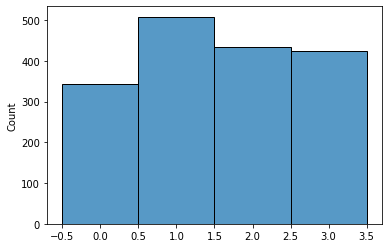

In [ ]:
sns.histplot(data=dataset_y, stat="count", discrete=True, bins=N_activities)

In [ ]:
dataset_x.shape

(1709, 200, 6)

In [ ]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=6,
         figsize=(30, 4),
         sharex=True)
    
    x = np.arange(data.shape[0])
    plot_axis(ax0, x, data[:,0], 'Gyroscope, x-Axis')
    plot_axis(ax1, x, data[:,1], 'Gyroscope, y-Axis')
    plot_axis(ax2, x, data[:,2], 'Gyroscope, z-axis')
    plot_axis(ax3, x, data[:,3], 'Accelerometer, x-Axis')
    plot_axis(ax4, x, data[:,4], 'Accelerometer, y-Axis')
    plot_axis(ax5, x, data[:,5], 'Accelerometer, z-axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(LABELS[activity-1])
    plt.subplots_adjust(top=0.8)
    plt.show()


def plot_activity(data, axes):
  print(data.shape)
  x = np.arange(data.shape[1])
  for l in range(len(axes)):
    ax = axes[l]
    for k in range(data.shape[0]):
      ax.plot(x, data[k,:,l], label="{:d}".format(k))



for activity in activities:
  label = activity["label"]
  idx = np.where(dataset_y == label)[0]

  fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=6,
         figsize=(30, 4),
         sharex=True)
  
  plot_activity(dataset_x[idx[:50], :, :], [ax0, ax1, ax2, ax3, ax4, ax5])
  
  ax0.set_ylabel("Gyro X")
  ax1.set_ylabel("Gyro Y")
  ax2.set_ylabel("Gyro Z")
  ax3.set_ylabel("Accel X")
  ax4.set_ylabel("Accel Y")
  ax5.set_ylabel("Accel Z")
  fig.suptitle(activity["name"])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from tensorflow.keras.utils import to_categorical
dataset_y_hot = to_categorical(dataset_y, num_classes=N_activities)
print('New dataset_y shape: ', dataset_y_hot.shape)

New dataset_y shape:  (1709, 4)


In [ ]:
from numpy.random import default_rng
rng = default_rng(seed=1234) # Use seed for reproducability

VALIDATION_SPLIT = 0.25

N_validation_samples = int(np.floor(dataset_samples * VALIDATION_SPLIT))
N_training_samples = dataset_samples - N_validation_samples


validation_set_indices = rng.integers(low=0, high=dataset_samples - 1, size=N_validation_samples)

validation_set_boolean_indices = np.zeros(dataset_samples, dtype=bool)
validation_set_boolean_indices[validation_set_indices] = True
training_set_boolean_indices = ~validation_set_boolean_indices


x_train = dataset_x[training_set_boolean_indices, :]
y_train = dataset_y[training_set_boolean_indices]
y_train_hot = dataset_y_hot[training_set_boolean_indices, :]

x_validate = dataset_x[validation_set_boolean_indices, :]
y_validate = dataset_y[validation_set_boolean_indices]
y_validate_hot = dataset_y_hot[validation_set_boolean_indices, :]

# Create, train and test the transfer-learnin model on the previously loaded dataset

In [ ]:
import os
import re

import numpy as np
import pandas as pd
from scipy import stats
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

from matplotlib import pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, AveragePooling2D, AveragePooling1D

In [ ]:
base_model = Sequential()
base_model.add(Reshape(target_shape=(200,6,1), input_shape=(1200,)))
base_model.add(Conv2D(filters=N_activities, kernel_size=(10,N_activities), activation="relu", use_bias=True))
base_model.add(Dropout(.2))
base_model.add(MaxPooling2D(pool_size=(10,1)))
base_model.add(Flatten(name="headlayer"))
base_model.add(Dense(2048 * N_activities, activation="relu", use_bias=True))
base_model.add(Dropout(.1))
base_model.add(Dense(512*N_activities, activation="relu", use_bias=True))
base_model.add(Dense(N_activities, activation='softmax', use_bias=True))

print(base_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 200, 6, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 191, 3, 4)         164       
_________________________________________________________________
dropout (Dropout)            (None, 191, 3, 4)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 3, 4)          0         
_________________________________________________________________
headlayer (Flatten)          (None, 228)               0         
_________________________________________________________________
dense (Dense)                (None, 8192)              1875968   
_________________________________________________________________
dropout_1 (Dropout)          (None, 8192)              0

# Reshape input data

In [ ]:
x_train_reshaped = x_train.reshape(x_train.shape[0],1200)
x_validate_reshaped = x_validate.reshape(x_validate.shape[0], 1200)

# Train Model

In [ ]:
base_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Hyper-parameters
BATCH_SIZE = 50
EPOCHS = 10

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = base_model.fit(x_train_reshaped, y_train_hot, batch_size=BATCH_SIZE, epochs=EPOCHS,
                      validation_split=0.2, verbose=1)

Train on 1056 samples, validate on 264 samples
Epoch 1/10
1056/1056 [==============================] - 8s 8ms/sample - loss: 0.9105 - accuracy: 0.6894 - val_loss: 1.4898 - val_accuracy: 0.0000e+00
Epoch 2/10
1056/1056 [==============================] - 7s 7ms/sample - loss: 0.0949 - accuracy: 0.9631 - val_loss: 0.0434 - val_accuracy: 1.0000
Epoch 3/10
1056/1056 [==============================] - 7s 7ms/sample - loss: 0.0301 - accuracy: 0.9896 - val_loss: 0.1006 - val_accuracy: 0.9924
Epoch 4/10
1056/1056 [==============================] - 7s 7ms/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 5/10
1056/1056 [==============================] - 7s 7ms/sample - loss: 6.6390e-04 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 6/10
1056/1056 [==============================] - 7s 7ms/sample - loss: 2.7314e-04 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 7/10
1056/1056 [==============================] - 7s 7ms/sa

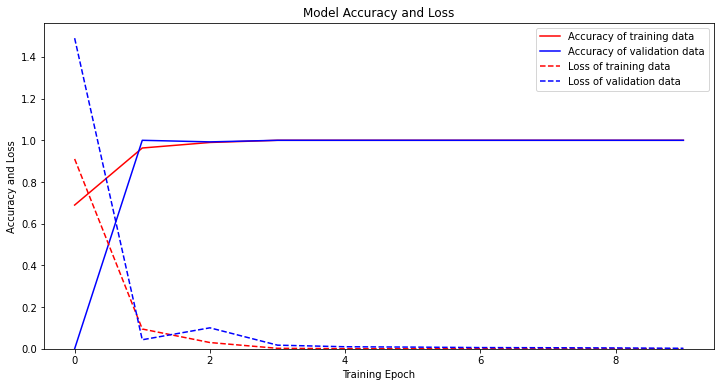

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
score = base_model.evaluate(x_validate_reshaped, y_validate_hot, verbose=0)

print('\nAccuracy on test data: %0.2f' % score[1])
print('\nLoss on test data: %0.2f' % score[0])


Accuracy on test data: 1.00

Loss on test data: 0.00


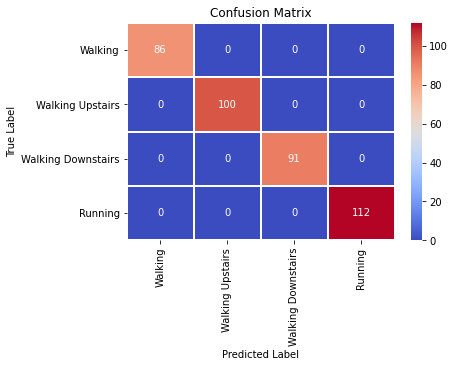

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00       112

    accuracy                           1.00       389
   macro avg       1.00      1.00      1.00       389
weighted avg       1.00      1.00      1.00       389



In [ ]:
import seaborn as sns

def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=dataset_label_strings,
                yticklabels=dataset_label_strings,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_validate = base_model.predict(x_validate_reshaped)
# Take the class with the highest probability from the test predictions
max_y_pred_validate = np.argmax(y_pred_validate, axis=1)
max_y_validate = np.argmax(y_validate_hot, axis=1)

show_confusion_matrix(max_y_validate, max_y_pred_validate)

print(classification_report(max_y_validate, max_y_pred_validate))

In [ ]:
base_model.save('/content/drive/MyDrive/MCL/WS04/base_model.pbtxt')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MCL/WS04/base_model.pbtxt/assets


# TFLite Conversion

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model, save_model
from tensorflow.keras import layers

In [ ]:
# Load the model
model = load_model('/content/drive/MyDrive/MCL/WS04/base_model.pbtxt')

In [ ]:
# Convert the model with TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
# converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]

tflite_model = converter.convert()
open("/content/drive/MyDrive/MCL/WS04/converted_base_model.tflite", "wb").write(tflite_model)

18698000

In [ ]:
x_validate_reshaped_ = x_validate_reshaped.astype("float32")

In [ ]:
# Run the model with TensorFlow to get expected results.
TEST_CASES = 10

# Run the model with TensorFlow Lite
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

for i in range(TEST_CASES):
  expected = model.predict(x_validate_reshaped_[i:i+1])
  interpreter.set_tensor(input_details[0]["index"], x_validate_reshaped_[i:i+1, :])
  interpreter.invoke()
  result = interpreter.get_tensor(output_details[0]["index"])

  # Assert if the result of TFLite model is consistent with the TF model.
  np.testing.assert_almost_equal(expected, result, decimal=1)
  print("Done. The result of TensorFlow matches the result of TensorFlow Lite.")

  # Please note: TfLite fused Lstm kernel is stateful, so we need to reset
  # the states.
  # Clean up internal states.
  interpreter.reset_all_variables()

Done. The result of TensorFlow matches the result of TensorFlow Lite.
Done. The result of TensorFlow matches the result of TensorFlow Lite.
Done. The result of TensorFlow matches the result of TensorFlow Lite.
Done. The result of TensorFlow matches the result of TensorFlow Lite.
Done. The result of TensorFlow matches the result of TensorFlow Lite.
Done. The result of TensorFlow matches the result of TensorFlow Lite.
Done. The result of TensorFlow matches the result of TensorFlow Lite.
Done. The result of TensorFlow matches the result of TensorFlow Lite.
Done. The result of TensorFlow matches the result of TensorFlow Lite.
Done. The result of TensorFlow matches the result of TensorFlow Lite.


In [ ]:
dir = "/content/drive/MyDrive/MCL/WS04/pretrained_model_device_dataset"
training_set_dir = dir + "/training_set"
test_set_dir = dir + "/test_set"
if os.path.isdir(dir):
  shutil.rmtree(dir)
os.mkdir(dir)
os.mkdir(training_set_dir)
os.mkdir(test_set_dir)

for k in range(N_training_samples):
  filename = training_set_dir + "/sample_{:d}_activity_{:d}.csv".format(k, y_train[k])
  #print("Writing \"{:s}\"".format(filename))
  np.savetxt(filename, x_train[k,:,:], delimiter=";")

for k in range(x_validate.shape[0]):
  filename = test_set_dir + "/sample_{:d}_activity_{:d}.csv".format(k, y_validate[k])
  #print("Writing \"{:s}\"".format(filename))
  np.savetxt(filename, x_validate[k,:,:], delimiter=";")

In [ ]:
x_train[100]

array([[ 0.03544241, -0.00939665,  0.16603849,  0.3215288 , -0.40372659,
         0.03119474],
       [ 0.12983826,  0.05136118,  0.16153152,  0.17263453, -0.38726483,
         0.1182975 ],
       [ 0.2250268 ,  0.1247282 ,  0.13415359,  0.21209479, -0.4090576 ,
         0.19730631],
       ...,
       [-0.21008788, -0.05899604,  0.19228003, -0.51586327, -0.26613392,
        -0.08832109],
       [-0.24528741, -0.19826036,  0.29706285, -0.82181174, -0.34654245,
        -0.09535697],
       [-0.28048695, -0.33752468,  0.40184566, -0.71648833, -0.39301234,
        -0.03594342]])

In [ ]:
x_train_reshaped[100][8]

0.16153152354678693